(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01694915, 0.01685313, 0.01656616, ..., 0.01656616, 0.01685313,
        0.01694915],
       [0.03389831, 0.03370626, 0.03313232, ..., 0.03313232, 0.03370626,
        0.03389831],
       ...,
       [0.96610169, 0.96062854, 0.94427107, ..., 0.94427107, 0.96062854,
        0.96610169],
       [0.98305085, 0.97748167, 0.96083723, ..., 0.96083723, 0.97748167,
        0.98305085],
       [1.        , 0.9943348 , 0.97740339, ..., 0.97740339, 0.9943348 ,
        1.        ]]), array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00,  1.80158450e-03,  3.58275633e-03, ...,
        -3.58275633e-03, -1.80158450e-03, -4.15134508e-18],
       [ 0.00000000e+00,  3.60316900e-03,  7.16551267e-03, ...,
        -7.16551267e-03, -3.60316900e-03, -8.30269016e-18],
       ...,
       [ 0.00000000e+00,  1.02690317e

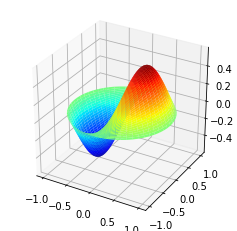

In [24]:
import ipywidgets as widgets

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

from scipy.special import jn, jn_zeros

# set up plot
fig=plt.figure(figsize=(4,4))
ax=fig.add_subplot(111, projection='3d')

 
# generate x values

def drumhead_height(n, k, distance, angle, t):
    nth_zero = jn_zeros(n, k)[-1]
    AA=(jn(n, distance*nth_zero))
    BB=np.cos(t)*np.cos(angle*n)
    ZZ=BB*AA
    return ZZ
 
def my_sine(n, k, t):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    radius = np.linspace(0,1,60)
    theta = np.linspace(0,2.*np.pi,60)
    x = np.array([r*np.cos(theta) for r in radius])
    y = np.array([r*np.sin(theta) for r in radius])
    z = np.array([drumhead_height(n,k,r,theta,t) for r in radius])#get the pixels we want to plot
    return x, y, z
 
n = 1.0
k=1
t=0
args = my_sine(n, k, t)
print(args)
ax.plot_surface(*args, rstride=1, cstride=1, cmap=cm.jet)

In [36]:
import ipywidgets as widgets

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

from scipy.special import jn, jn_zeros



 
# generate x values

def drumhead_height(n, k, distance, angle, t):
    nth_zero = jn_zeros(n, k)[-1]
    AA=(jn(n, distance*nth_zero))
    BB=np.cos(t)*np.cos(angle*n)
    ZZ=BB*AA
    return ZZ
 
def my_sine(n, k, t):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    radius = np.linspace(0,1,60)
    theta = np.linspace(0,2.*np.pi,60)
    x = np.array([r*np.cos(theta) for r in radius])
    y = np.array([r*np.sin(theta) for r in radius])
    z = np.array([drumhead_height(n,k,r,theta,t) for r in radius])#get the pixels we want to plot
    return x, y, z
 
 
@widgets.interact(n=(0, 5, 1), k=(1, 4, 1), t=(0, 10, 0.5))
def update(n = 1.0, k=1, t=0):
    # set up plot
    fig=plt.figure(figsize=(6,6))
    ax=fig.add_subplot(111, projection='3d')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-1, 1)
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    args = my_sine(n, k, t)
    ax.plot_surface(*args, rstride=1, cstride=1, cmap=cm.jet)

interactive(children=(IntSlider(value=1, description='n', max=5), IntSlider(value=1, description='k', max=4, m…